In [0]:
import numpy as np
import keras
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import  Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

import matplotlib.pyplot as plt
import itertools

Using TensorFlow backend.


In [0]:
#chargment des images
img_width, img_height = 200, 200
train_data_file = 'drive/My Drive/projetb/data/train2'
validation_data_file = 'drive/My Drive/projetb/data/validation2'
test_data_file = 'drive/My Drive/projetb/data/test2'

train_batches= ImageDataGenerator().flow_from_directory(train_data_file, target_size=(img_width, img_height), classes=['cardboard','clean','glass','metal','paper','plastic'], batch_size=200, shuffle=True)
valid_batches= ImageDataGenerator().flow_from_directory(validation_data_file, target_size=(img_width, img_height), classes=['cardboard','clean','glass','metal','paper','plastic'], batch_size=100, shuffle=True)
test_batches= ImageDataGenerator().flow_from_directory(test_data_file, target_size=(img_width, img_height), classes=['cardboard','clean','glass','metal','paper','plastic'], batch_size=25, shuffle=True)


Found 2524 images belonging to 6 classes.
Found 110 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [0]:
#Afficher images aléatoires

def plots(img, figsize=(200,200), rows=1, titles=None):
  if type (img[0]) is np.ndarray :
    img = np.array(img).astype(np.uint8)
    if (img.shape[-1]!=3):
      img= img.transpose(0,2,3,1)
  f = plt.figure(figsize=figsize)
  col= len(img)//rows if len(img) % 2 == 0 else len(img)//rows + 1
  for i in range(len(img)):
    sp=f.add_subplot(rows, col, i+1)
    if titles is not None :
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(img[i])


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


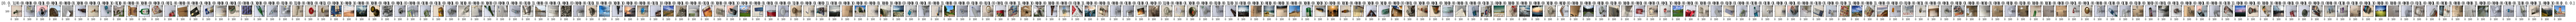

In [0]:
img , labels = next(train_batches)
plots(img, titles = labels)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels

#model.summary()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Dropout(0.6, input_shape=(60,)))

model.add(Conv2D(256, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Dropout(0.6, input_shape=(60,)))

model.add(Conv2D(256, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Dropout(0.5, input_shape=(60,)))

model.add(Conv2D(256, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(256, (3,3), activation='relu', input_shape=(200,200,3))) #prend 32 features en recherche 3*3 pixels
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Dropout(0.5, input_shape=(60,)))

model.add(Flatten())
model.add(Dense(6,activation='softmax'))



model.summary()
#model.add(MaxPooling2D(pool_size=(2,2))) #recupe les datas utiles (les pixels les plus grands pour conserver les carastéristiques)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 256)      

In [0]:
model.compile(Adam(lr=0.0001),loss ='categorical_crossentropy', metrics=['accuracy']) #learning rate 0.0001



In [0]:
model.fit_generator(
    train_batches,
    epochs=500,
    validation_data=valid_batches,
    verbose=2,
    workers=2
    )

model.save_weights('try_1.h5')

Epoch 1/500


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 572s - loss: 66.7808 - accuracy: 0.1775 - val_loss: 2.5003 - val_accuracy: 0.2364
Epoch 2/500
 - 486s - loss: 11.3169 - accuracy: 0.1735 - val_loss: 1.7540 - val_accuracy: 0.1727
Epoch 3/500
 - 487s - loss: 2.6792 - accuracy: 0.1819 - val_loss: 1.8005 - val_accuracy: 0.2091
Epoch 4/500


In [0]:
test_img , test_label = next(test_batches)
plots(test_img, titles= test_label)

test_label = test_label[:,:]
test_label

In [0]:
predictions = model.predict_generator(test_batches , verbose=1)
predictions
np.argmax(predictions, axis=1)

In [0]:
model.save('drive/My Drive/projetb/data/partie2.h5')
model = keras.models.load_model('drive/My Drive/projetb/data/partie2.h5')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_model.tflite", "wb").write(tflite_model)